In [7]:
from sklearn import preprocessing
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [85]:
boston = datasets.load_boston()

In [86]:
boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

In [96]:
X,y = boston.data[:,5:6],boston.target

In [97]:
X.shape

(506, 1)

# Data preprocessing

In [98]:
y = np.reshape(y,(506,1))

In [99]:
X_new = preprocessing.scale(X)

In [100]:
# Appending a column of ones in the feature matrix for theta0

X_new = np.concatenate((np.ones((X_new.shape[0],1)),X_new),axis=1)
X_new

array([[ 1.        ,  0.41367189],
       [ 1.        ,  0.19427445],
       [ 1.        ,  1.28271368],
       ...,
       [ 1.        ,  0.98496002],
       [ 1.        ,  0.72567214],
       [ 1.        , -0.36276709]])

In [120]:
alpha = 0.1
n_iterations = 60
m = X.shape[0]
theta = np.random.randn(2,1)
cost_history = np.zeros(n_iterations)

for iterations in range(n_iterations):
    j = 0
    #print(X_new.T.dot(X_new.dot(theta) - y))
    gradients = (X_new.T.dot(X_new.dot(theta) - y) ).astype(float) / m
    #print(gradients)
    theta = theta - alpha*gradients
    print(theta)
    j = np.sum(np.square(X_new.dot(theta) - y )).astype(float) / (2*m)
    cost_history[iterations] = j
    #print(j)

[[ 2.14142151]
 [-0.2765813 ]]
[[4.18055999]
 [0.38997435]]
[[6.01578462]
 [0.98987444]]
[[7.66748679]
 [1.52978451]]
[[9.15401875]
 [2.01570358]]
[[10.49189751]
 [ 2.45303075]]
[[11.69598839]
 [ 2.8466252 ]]
[[12.77967018]
 [ 3.2008602 ]]
[[13.7549838]
 [ 3.5196717]]
[[14.63276605]
 [ 3.80660205]]
[[15.42277008]
 [ 4.06483937]]
[[16.1337737 ]
 [ 4.29725295]]
[[16.77367696]
 [ 4.50642518]]
[[17.3495899 ]
 [ 4.69468019]]
[[17.86791154]
 [ 4.86410969]]
[[18.33440102]
 [ 5.01659624]]
[[18.75424155]
 [ 5.15383414]]
[[19.13209803]
 [ 5.27734825]]
[[19.47216886]
 [ 5.38851095]]
[[19.7782326 ]
 [ 5.48855737]]
[[20.05368998]
 [ 5.57859916]]
[[20.30160161]
 [ 5.65963676]]
[[20.52472208]
 [ 5.73257061]]
[[20.72553051]
 [ 5.79821107]]
[[20.90625809]
 [ 5.85728749]]
[[21.06891291]
 [ 5.91045626]]
[[21.21530225]
 [ 5.95830816]]
[[21.34705266]
 [ 6.00137486]]
[[21.46562803]
 [ 6.0401349 ]]
[[21.57234586]
 [ 6.07501893]]
[[21.6683919 ]
 [ 6.10641456]]
[[21.75483335]
 [ 6.13467063]]
[[21.83263064]
 [ 

In [121]:
theta

array([[22.49209129],
       [ 6.37566625]])

(3.2901933691756273, 9.05080663082437)

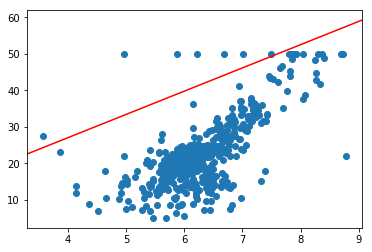

In [122]:
fig, ax = plt.subplots()
ax.scatter(X, y)

# need a slope and c to fix the position of line
slope = theta[1]
c = theta[0]

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], color='r')
ax.set_xlim([x_min, x_max])

ValueError: Input passed into argument "u'y1'"is not 1-dimensional.

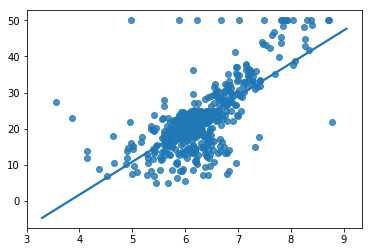

In [123]:
sns.regplot(X,y)

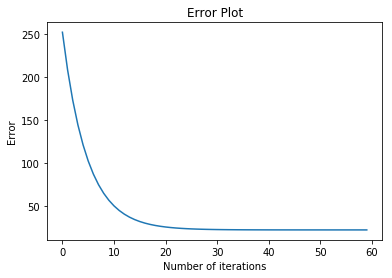

In [124]:
plt.title("Error Plot")
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.plot(cost_history)
plt.show()

In [1]:
def func_y(x):
    y = x**2 - 4*x + 2

    return y


In [2]:
def gradient_descent(previous_x, learning_rate, epoch):
    x_gd = []
    y_gd = []
    
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))

    # begin the loops to update x and y
    for i in range(epoch):
        current_x = previous_x - learning_rate*(2*previous_x - 4)
        x_gd.append(current_x)
        y_gd.append(func_y(current_x))

        # update previous_x
        previous_x = current_x

    return x_gd, y_gd


In [3]:
#Initialize x0 and learning rate
x0 = -0.7
learning_rate = 0.15
epoch = 10


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

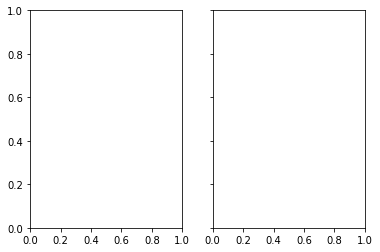

In [6]:
# y = x^2 - 4x + 2
x = np.arange(-1, 5, 0.01)
y = func_y(x)

fig, ax = plt.subplots(1, 2, sharey = True)

ax.plot(x, y, lw = 0.9, color = 'k')
ax.set_xlim([min(x), max(x)])
ax.set_ylim([-3, max(y)+1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
